In [12]:
from utils import *
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
import pandas as pd


In [ ]:
"load data according to a certain sumulation"
beta = 0.03
gamma = 0.5
dt = 5e-4
num_pts = 700000
metropolis = True
mueller_brown_p = True

if metropolis:
    path = "/home/clod/Desktop/Thesis/toy-model/langevin_metropolis/"

    if mueller_brown_p:
        path += "mueller_brown/"
    else:
        path += "gaussian_potential/"

else:
    path = "/home/clod/Desktop/Thesis/toy-model/langevin/"

# path example:/home/clod/Desktop/Thesis/toy-model/langevin/beta=0.05_gamma=0.5_dt=1e-05
# /home/clod/Desktop/Thesis/toy-model/langevin/beta=0.05_gamma=0.5_dt=0.0001

directory = path + "beta=" + str(beta) + "_gamma=" + str(gamma) + "_dt=" + str(dt) + "/nmpts=" + str(num_pts) + "/"
print("Loading data from: ", directory)
if not os.path.exists(directory):
    sys.exit("Directory does not exist")

X,Y,energy = np.loadtxt(os.path.join(directory,"data_langevin.txt"), skiprows=1, unpack=True)

Loading data from:  /home/clod/Desktop/Thesis/toy-model/langevin_metropolis/mueller_brown/beta=0.03_gamma=0.5_dt=0.0005/nmpts=700000/


#use this cell if you want to limit the result to a grid ( incorrect i think)

x1_min, x1_max = -2.0, 1.0
x2_min, x2_max = -0.5, 2.0

#create a data frame
df = pd.DataFrame({'x1': X, 'x2': Y, 'energy': energy})

#remove points outside the specified range
df = df[(df['x1'] >= x1_min) & (df['x1'] <= x1_max) & (df['x2'] >= x2_min) & (df['x2'] <= x2_max)]

#return to X, Y, energy
X = df['x1'].values
Y = df['x2'].values 
energy = df['energy'].values


In [14]:
def compare_energy(energy, true_energy, correction = 0, title_1 = "Sampled energy", title_2 = "True energy", save_path = None):
   
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    corrected_E =np.array(energy - correction)
    
    vmin= np.min(np.concatenate((corrected_E,true_energy)))
    vmax= np.max(np.concatenate((corrected_E,true_energy)))

    # Left Plot: Energy with correction
    sc1 = ax[0].scatter(X, Y, c=energy -correction, cmap=cm.viridis_r, vmin=vmin, vmax=vmax)
    ax[0].set_title(title_1)
    ax[0].set_xlabel("X")
    ax[0].set_ylabel("Y")

    # Right Plot: true energy
    sc2 = ax[1].scatter(X, Y, c= true_energy, cmap=cm.viridis_r, vmin=vmin, vmax=vmax)
    ax[1].set_title(title_2)
    ax[1].set_xlabel("X")
    ax[1].set_ylabel("Y")

    # Create a single colorbar for both plots
    cbar = fig.colorbar(sc1, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    cbar.set_label("Energy")

    if save_path:
        plt.savefig(save_path, dpi=300)

    plt.show()

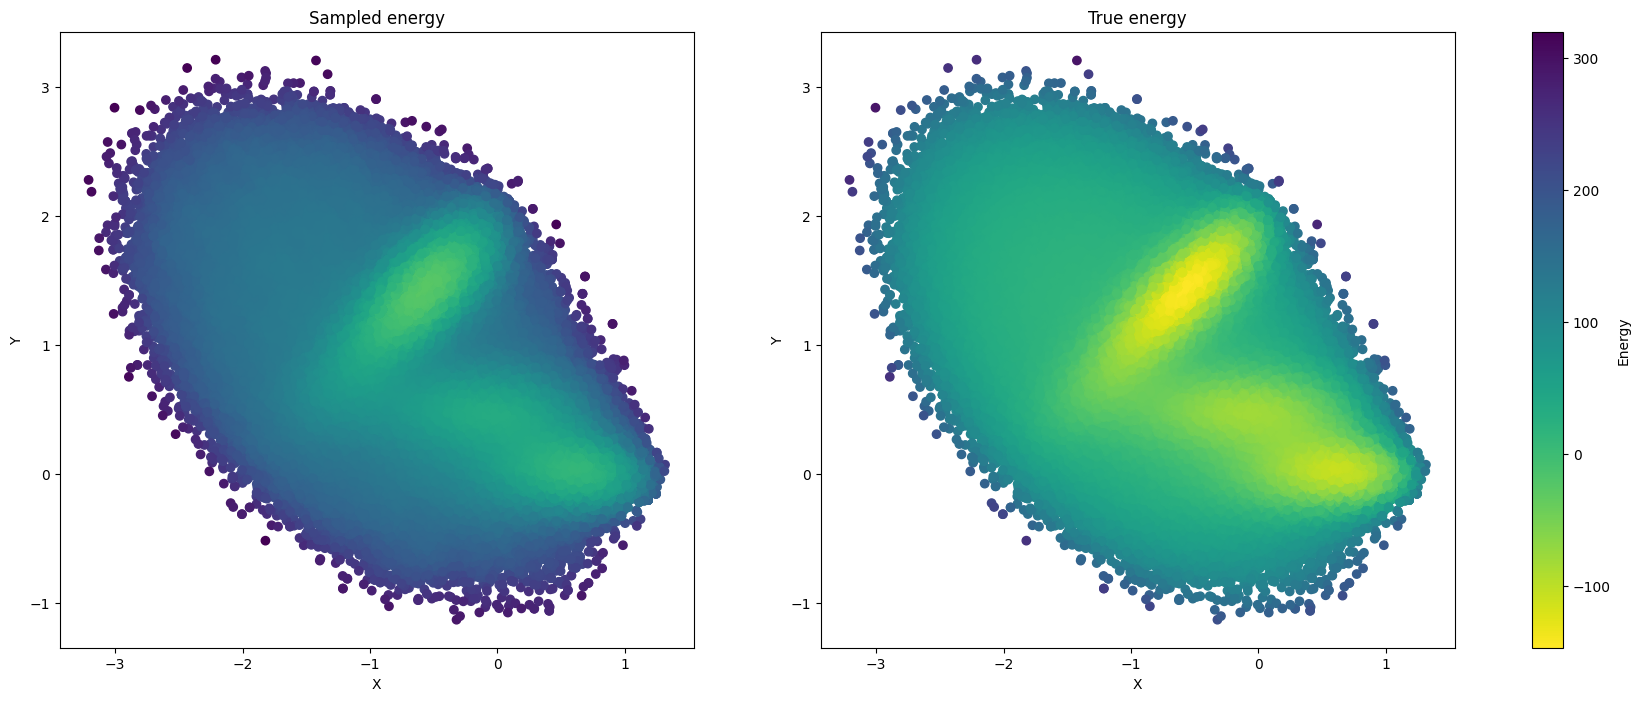

In [15]:
#compute the true energy
points = torch.tensor(np.array([X,Y])).T
#print(points)
true_energy = mueller_brown(points).detach().numpy()

"""
#plot the true energy
plt.figure(figsize=(10,8))
plt.title("True Energy Landscape")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X,Y, c=true_energy, cmap=cm.viridis_r)
plt.colorbar(label="Energy")
#plt.savefig(os.path.join(directory,"true_energy.png"))
plt.show()
#plot the energy
"""

save_path = os.path.join(directory,"energy_comparison.png")

compare_energy(energy, true_energy, correction = 0, title_1 = "Sampled energy", title_2 = "True energy", save_path = save_path)

In [16]:
# dumb estimation of the normalization factor
# this is not the right way to do it, but it works for now
# the right way to do it is to use the partition function

E_diff = energy - true_energy

K = np.mean(E_diff)
print("K: ", K)

# maybe a better estimation of the normalization factor
# find the minimum energy and the coordinates 
min_index = np.argmin(true_energy)

min_true_energy = true_energy[min_index]
min_energy = energy[min_index]
min_x = X[min_index]
min_y = Y[min_index]
print("Minimum x: ", min_x)
print("Minimum y: ", min_y)


print("Minimum true energy: ", min_true_energy)
print("Minimum energy: ", min_energy)

# the correction now is the difference between the minimum energy and the minimum true energy
#K = min_energy - min_true_energy
print("new K: ", K)


K:  112.74535985452465
Minimum x:  -0.5589702220988017
Minimum y:  1.441404895841797
Minimum true energy:  -146.69921563939127
Minimum energy:  -26.066033935219817
new K:  112.74535985452465


corrected_E:  [  0.66070501 -70.38173183 -71.04670119 ... -54.83130371 -75.71240832
 -75.71240832]
true_energy:  [  5.28242377 -70.3094505  -72.43859413 ... -55.96197249 -78.86964761
 -78.86964761]


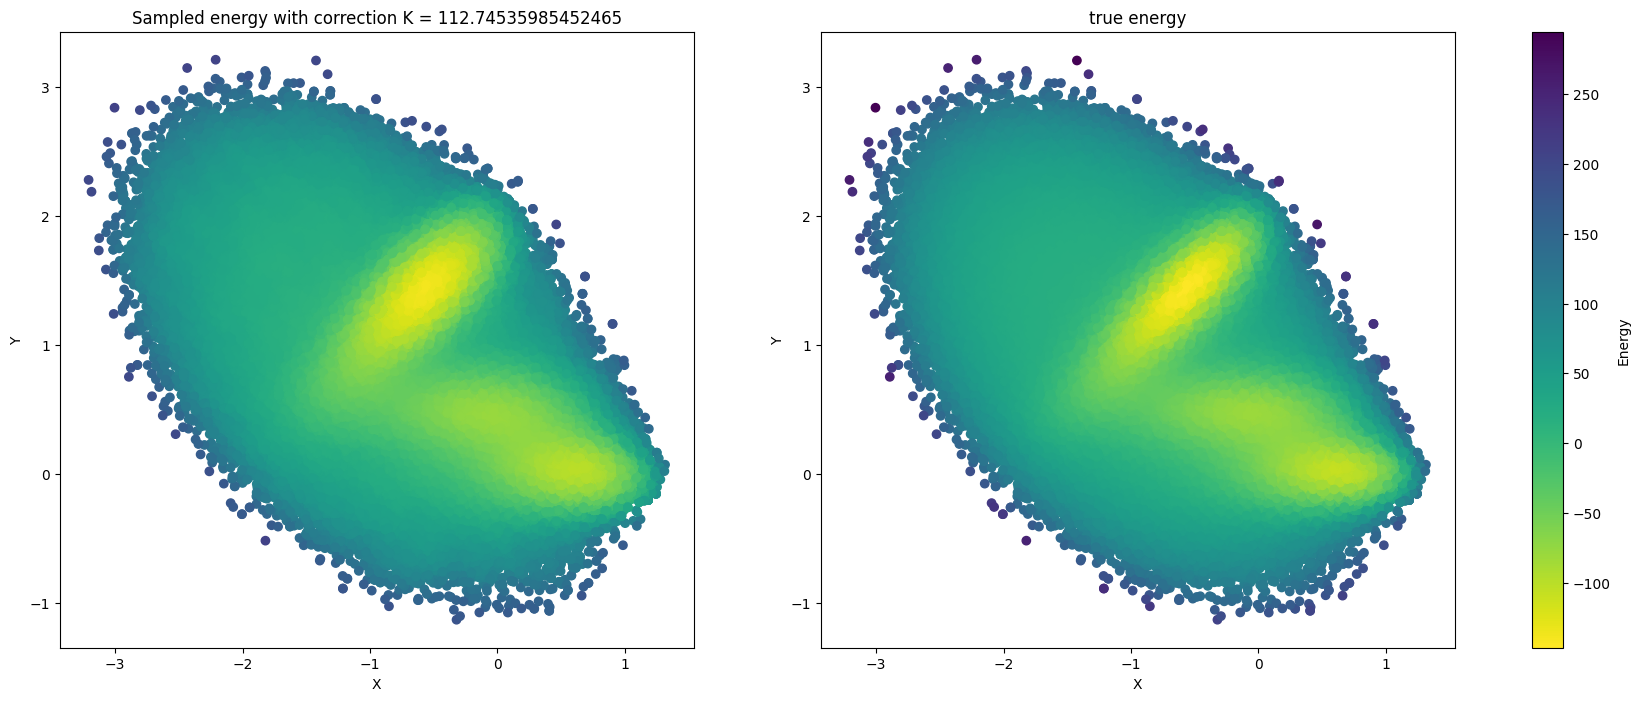

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
corrected_E =np.array(energy - K)
print("corrected_E: ", corrected_E)
print("true_energy: ", true_energy)
vmin= np.min(np.concatenate((corrected_E,true_energy)))
vmax= np.max(np.concatenate((corrected_E,true_energy)))

# Left Plot: Energy wit correction
sc1 = ax[0].scatter(X, Y, c=energy -K, cmap=cm.viridis_r, vmin=vmin, vmax=vmax)
ax[0].set_title("Sampled energy with correction K = " + str(K))
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")

# Right Plot: true energy
sc2 = ax[1].scatter(X, Y, c= true_energy, cmap=cm.viridis_r, vmin=vmin, vmax=vmax)
ax[1].set_title("true energy")
ax[1].set_xlabel("X")
ax[1].set_ylabel("Y")

# Create a single colorbar for both plots
cbar = fig.colorbar(sc1, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
cbar.set_label("Energy")

plt.savefig(os.path.join(directory,"energy_comparison_corrected.png"), dpi=300)

plt.show()

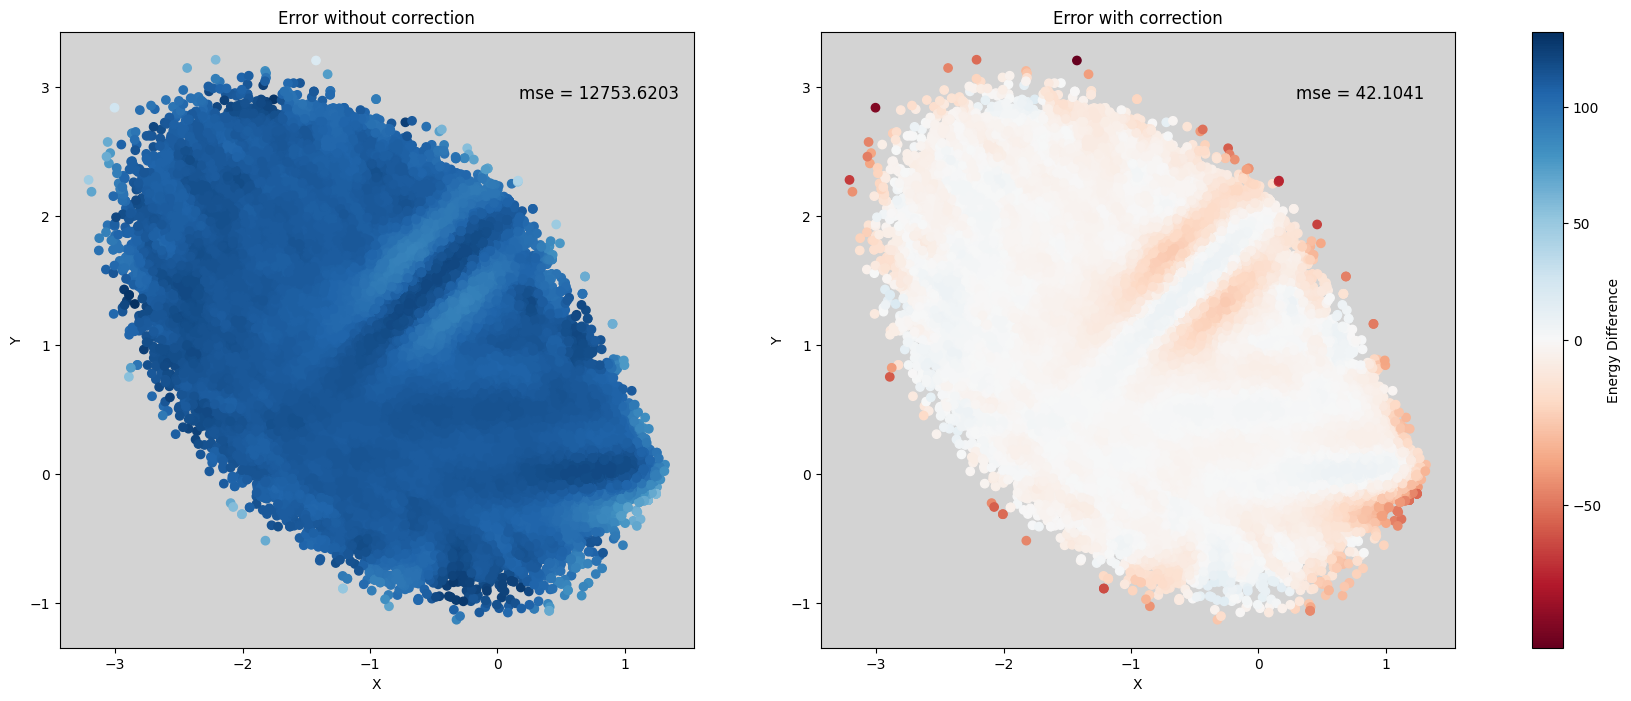

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

vmin= np.min(np.concatenate((E_diff, E_diff-K)))
vmax= np.max(np.concatenate((E_diff, E_diff-K)))

cmap = "RdBu"

norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter = 0,  vmax=vmax)

# Left Plot: Error without correction
ax[0].set_facecolor('lightgray')
sc1 = ax[0].scatter(X, Y, c=E_diff, cmap=cmap, norm = norm)
ax[0].set_title("Error without correction")
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")

# Right Plot: Error with correction
ax[1].set_facecolor('lightgray') 
sc2 = ax[1].scatter(X, Y, c=E_diff - K, cmap=cmap, norm = norm  )
ax[1].set_title("Error with correction")
ax[1].set_xlabel("X")
ax[1].set_ylabel("Y")

ax[0].text(0.85, 0.9, f"mse = {(1/num_pts*np.sum(E_diff**2)):.4f}", 
           fontsize=12, ha='center', va='center', transform=ax[0].transAxes)

ax[1].text(0.85, 0.9, f"mse = {1/num_pts*np.sum((E_diff - K)**2):.4f}", 
           fontsize=12, ha='center', va='center', transform=ax[1].transAxes)



# Create a single colorbar for both plots
cbar = fig.colorbar(sc1, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
cbar.set_label("Energy Difference")

plt.savefig(os.path.join(directory,"energy_difference_corr.png"), dpi=300)

plt.show()

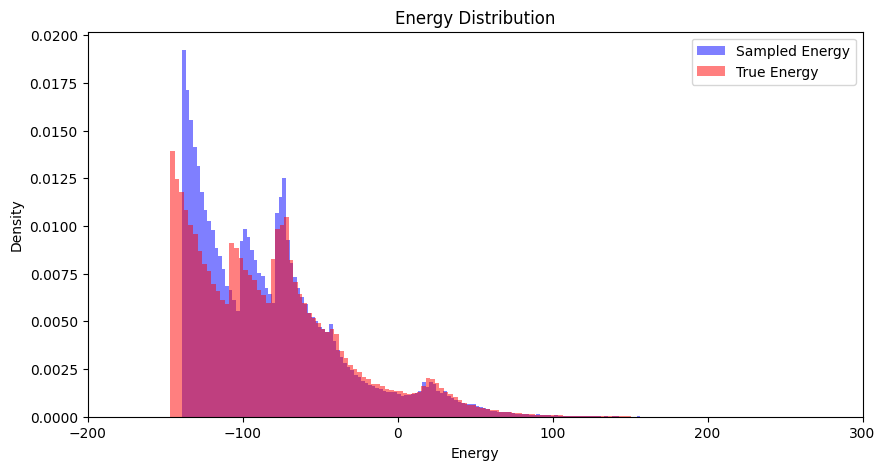

In [19]:
density = True

#plot energy distribution 
plt.figure(figsize=(10,5))
plt.title("Energy Distribution")
plt.xlabel("Energy")
plt.ylabel("Density")
plt.hist(energy - K, bins=150, density= density, alpha=0.5, color='blue', label='Sampled Energy')
plt.hist(true_energy, bins=150, density=density, alpha=0.5, color='red', label='True Energy')
#plt.axvline(x=K, color='black', linestyle='--', label='Correction')
plt.xlim(-200,300)
plt.legend()
#plt.savefig(os.path.join(directory,"energy_distribution.png"))
plt.show()